# Cluster Analysis in Python

## Introduction to Clustering

### Pokémon sightings

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]

In [8]:
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

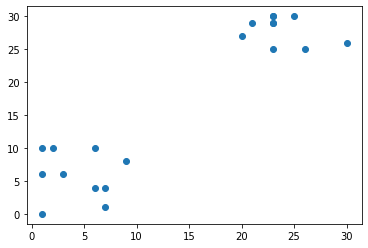

In [10]:
plt.scatter(x, y);

### Pokémon sightings: hierarchical clustering

In [11]:
import pandas as pd

In [20]:
df = pd.DataFrame(data={'x':x,'y':y})

In [23]:
from scipy.cluster.hierarchy import linkage, fcluster

In [27]:
import seaborn as sns

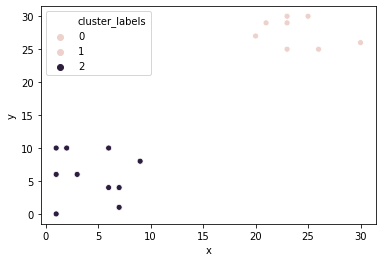

In [28]:
# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df);

### Pokémon sightings: k-means clustering

In [32]:
df = df.drop('cluster_labels', axis=1).astype(float)

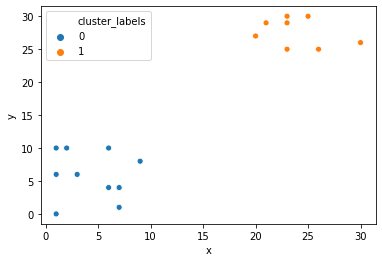

In [34]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Normalize basic list data

In [36]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


### Visualize normalized data

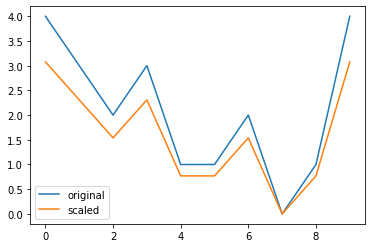

In [38]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

### Normalization of small numbers

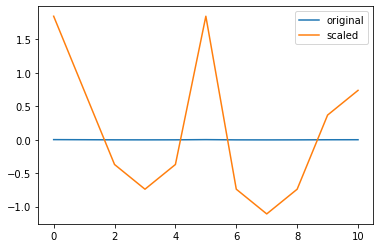

In [40]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005, 0.001]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [41]:
scaled_data

array([ 1.84776114,  0.73910445, -0.36955223, -0.73910445, -0.36955223,
        1.84776114, -0.73910445, -1.10865668, -0.73910445,  0.36955223,
        0.73910445])

Notice how the changes in the original data are negligible as compared to the scaled dat

### FIFA 18: Normalize data

In [43]:
fifa = pd.read_csv('fifa_18_sample_data.csv')

In [44]:
fifa.shape

(1000, 185)

In [45]:
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [46]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

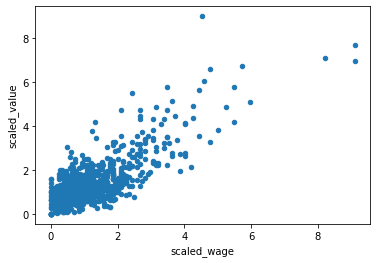

In [47]:
# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

In [48]:
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


you can see the scaled values have a standard deviation of 1.

## Hierarchical Clustering

In [59]:
comic_con = pd.read_csv('comic_con.csv')

In [60]:
comic_con

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17.0,4.0,0.509349,0.090010
1,20.0,6.0,0.599234,0.135015
2,35.0,0.0,1.048660,0.000000
3,14.0,0.0,0.419464,0.000000
4,37.0,4.0,1.108583,0.090010
5,33.0,3.0,0.988736,0.067507
6,14.0,1.0,0.419464,0.022502
7,30.0,6.0,0.898851,0.135015
8,35.0,5.0,1.048660,0.112512
9,17.0,4.0,0.509349,0.090010


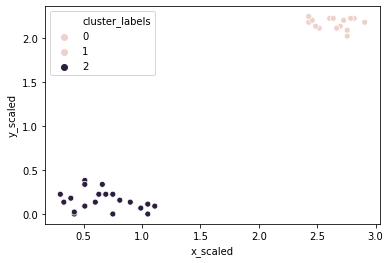

In [61]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: single method

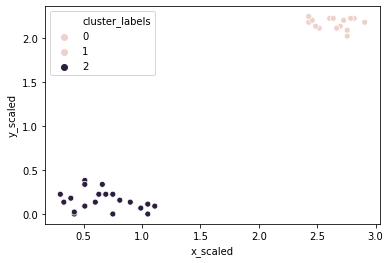

In [62]:
from scipy.cluster.hierarchy import fcluster, linkage

distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: complete method

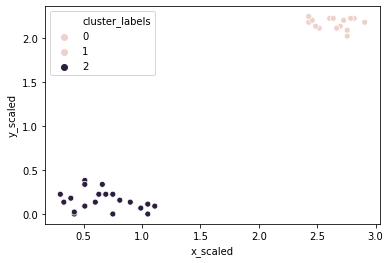

In [63]:
from scipy.cluster.hierarchy import linkage, fcluster

distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)


### Visualize clusters with matplotlib

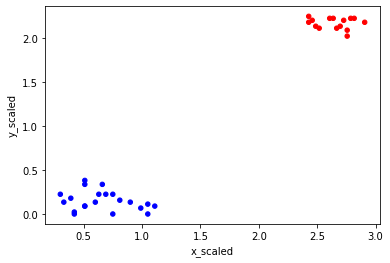

In [64]:
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x = 'x_scaled', 
                	   y = 'y_scaled',
                	   c = comic_con['cluster_labels'].map(colors))
plt.show()

### Visualize clusters with seaborn

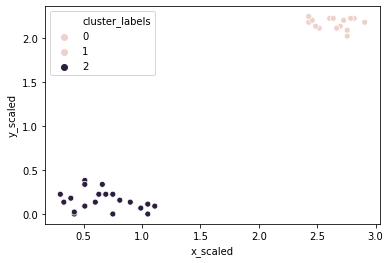

In [67]:
import seaborn as sns

sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

### Create a dendrogram

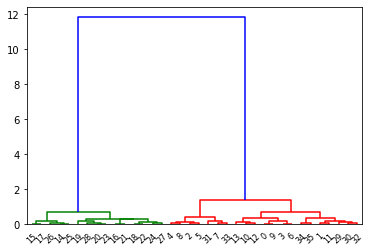

In [68]:
from scipy.cluster.hierarchy import dendrogram 

Z = linkage(comic_con[['x_scaled','y_scaled']],method='ward',metric='euclidean')

# Create a dendrogram
dn = dendrogram(Z)

# Display the dendogram
plt.show()

### How many clusters in comic con data?

2

### Timing run of hierarchical clustering

In [69]:
%timeit sum([1, 3, 2])

232 ns ± 9.23 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [70]:
%timeit linkage(comic_con[['x_scaled','y_scaled']],method='ward',metric='euclidean')

1.18 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### FIFA 18: exploring defenders

In [80]:
fifa = pd.read_csv('fifa_18_dataset.csv')

In [81]:
fifa.shape

(17994, 2)

In [82]:
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [83]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [84]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


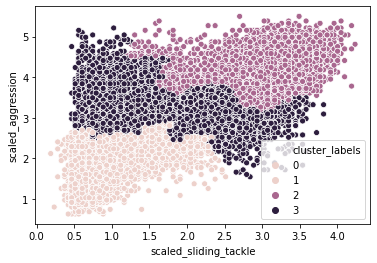

In [85]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

## K-Means Clustering

### K-means clustering: first exercise

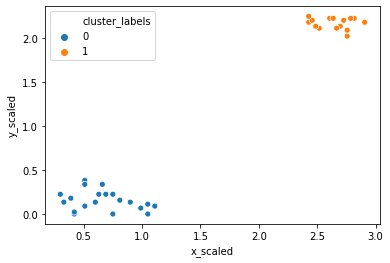

In [86]:
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Elbow method on distinct clusters

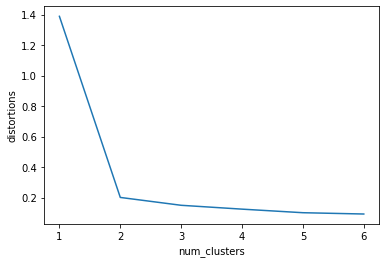

In [87]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Elbow method on uniform data

In [90]:
uniform_data = pd.read_csv('uniform_data.csv')

In [91]:
uniform_data.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,39.0,3.0,2.376199,1.152237
1,42.0,7.0,2.558984,2.688554
2,58.0,3.0,3.533835,1.152237
3,43.0,3.0,2.619912,1.152237
4,13.0,6.0,0.792066,2.304475


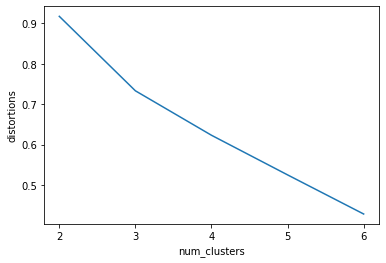

In [92]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

cannot be determined the cluster number k!

### Impact of seeds on distinct clusters

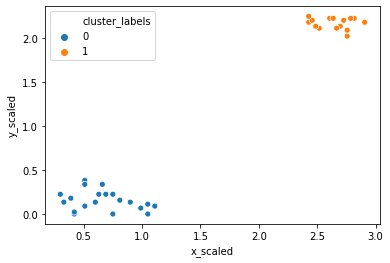

In [93]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

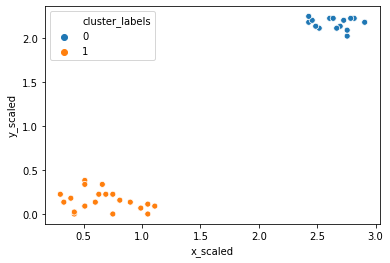

In [94]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Uniform clustering patterns

In [98]:
mouse = pd.read_csv('mouse.csv')

In [99]:
mouse.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,33.875528,44.893421,2.209458,2.977524
1,38.208748,41.116327,2.492083,2.727011
2,35.740588,57.418006,2.331103,3.808208
3,32.546963,57.218082,2.122806,3.794948
4,62.063146,47.196944,4.047935,3.130303


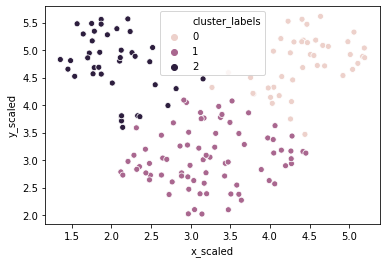

In [100]:
# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

### FIFA 18: defenders revisited

In [101]:
# Set up a random seed in numpy
random.seed([1000, 2000])

In [104]:
fifa = pd.read_csv('fifa_18_sample_data.csv')

In [105]:
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [112]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [113]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

In [114]:
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


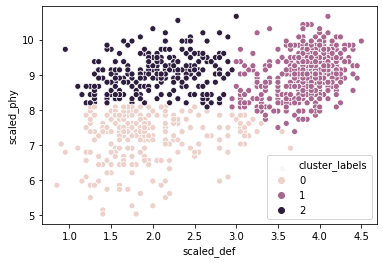

In [115]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

## Clustering in Real World


<img src='batman.jpg'/>

In [123]:
import matplotlib.image as img

batman_image = img.imread('batman.jpg')
print(batman_image.shape)

r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [142]:
batman_df =  pd.read_csv('batman_df.csv')

In [145]:
batman_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,10,15,9,0.134338,0.179734,0.126269
1,14,49,36,0.188074,0.587133,0.505076
2,55,125,103,0.738862,1.497787,1.445077
3,35,129,98,0.470185,1.545716,1.374928
4,38,134,101,0.510486,1.605628,1.417017


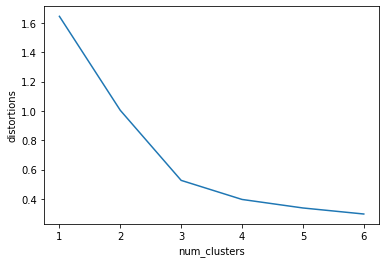

In [146]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Display dominant colors

In [156]:
cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

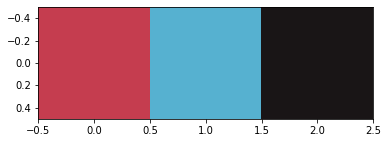

In [157]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

### TF-IDF of movie plots

In [158]:
plots = pd.read_csv('movies_plot.csv')

In [159]:
plots

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...
...,...,...
995,Unknown Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
996,Boss Nigger,"Upon finding a wagon under attack by bandits, ..."
997,Secret Command,The plot involves a U.S. effort to root out Na...
998,The Monolith Monsters,"In the desert outside of San Angelo, Californi..."


In [164]:
stop_words2= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'dont',
 'should',
 'shouldve',
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'arent',
 'couldn',
 'couldnt',
 'didn',
 'didnt',
 'doesn',
 'doesnt',
 'hadn',
 'hadnt',
 'hasn',
 'hasnt',
 'haven',
 'havent',
 'isn',
 'isnt',
 'ma',
 'mightn',
 'mightnt',
 'mustn',
 'mustnt',
 'needn',
 'neednt',
 'shan',
 'shant',
 'shouldn',
 'shouldnt',
 'wasn',
 'wasnt',
 'weren',
 'werent',
 'won',
 'wont',
 'wouldn',
 'wouldnt']

In [173]:
from nltk.tokenize import word_tokenize
import re

In [178]:
def remove_noise(text, stop_words = stop_words2):

    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:

        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())

    return cleaned_tokens

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=remove_noise, max_df=.75, min_df=0.1, max_features=50)

tfidf_matrix = tfidf_vectorizer.fit_transform(plots.Plot.values)

### Top terms in movie clusters

In [180]:
num_clusters = 2

cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['film', 'life', 'family']
['one', 'back', 'two']


### Basic checks on clusters

In [182]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    242
1    501
2    257
Name: ID, dtype: int64
cluster_labels
0    67971.074380
1    69043.912176
2    71564.202335
Name: eur_wage, dtype: float64


### FIFA 18: what makes a complete player?

In [183]:
features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']

In [184]:
scaled_features = ['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']

In [188]:
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_pas'] = whiten(fifa['pas'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_pac'] = whiten(fifa['pac'])

In [189]:
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.454041    3.668379    7.174064    6.767575    3.966702   
1                 6.684070    5.430915    8.455704    8.514977    2.500552   

                scaled_phy  
cluster_labels              
0                 9.209874  
1                 8.334066  


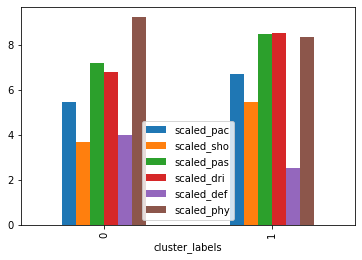

In [190]:
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

In [191]:
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']
